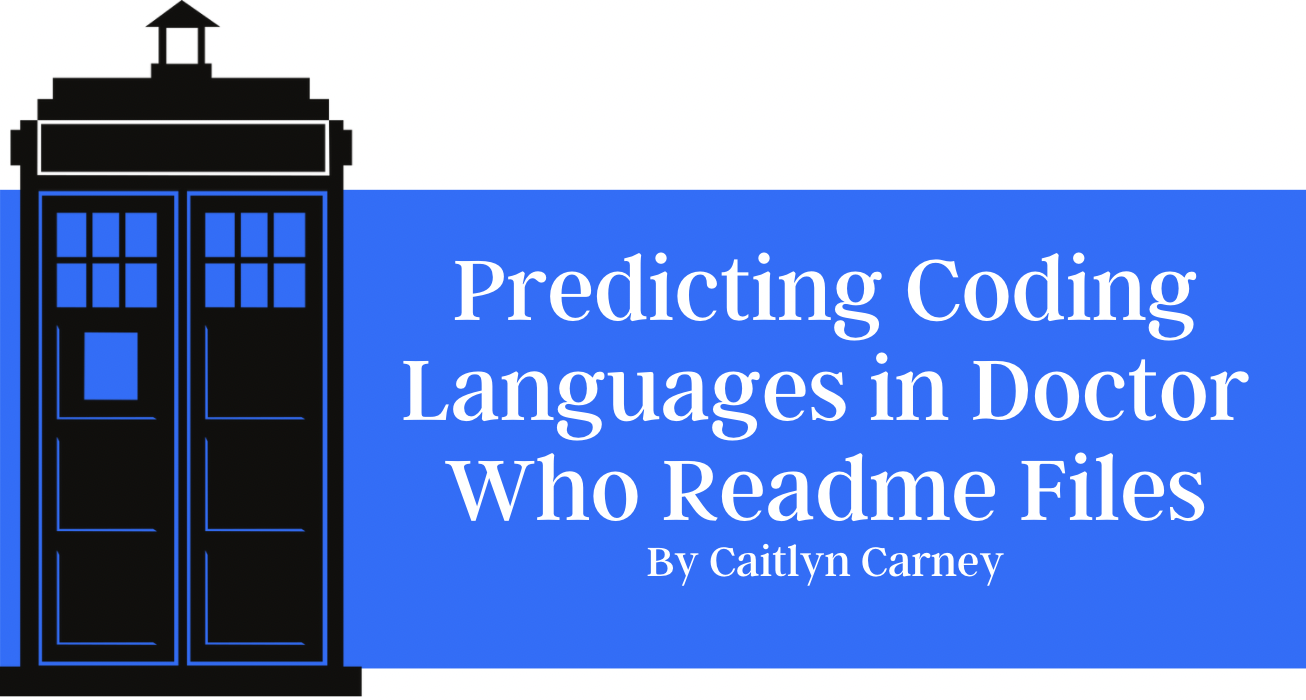

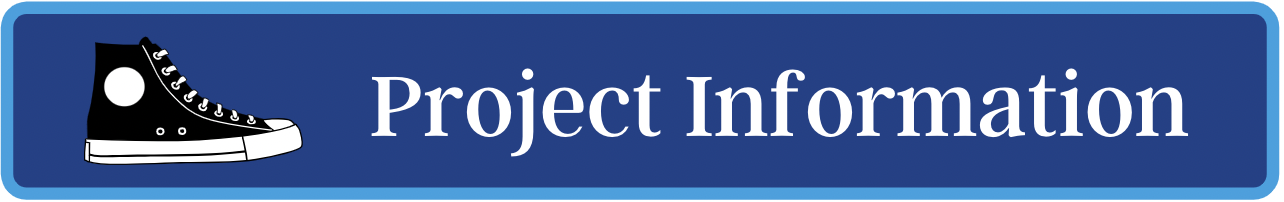

## <span style='color:black'> <span style='background :deepskyblue' > Description </span>

Using web-scraping techniques scrape githubs doctor who repositories to take the text from the readme files and the primary coding language; to build a data set. Then transform the new dataset into a form that can be used in a natural language processing machine learning model (NLP)., and choosing the best one for predicting the coding language based on the text from readme files.

## <span style='color:black'> <span style='background :deepskyblue' > Goal </span>

Create a NLP model to predict the programming language used in a github repository based on the words and word combinations found in the readme files.

## <span style='color:black'> <span style='background :deepskyblue' > A Few Things to Note Before Starting </span>

- After I aquired the data I created a csv which I will be pulling from.
- After I cleaned the data I created another csv that I once again will pull from in this notebook.
- All funcitons used in this notebook can be found in:
    - acuire.py
    - prepare.py
    - explore.py
    - model.py

## <span style='color:black'> <span style='background :deepskyblue' > Quick Overview of the Findings </span>

- There were no commonalities between the languages and their top 20 words/phrases.
- Java script is the most commonly used coding language and makes up the top 10 most frequent words of all languages together.
- There are specific phrases/words that are used more often in each coding language.
- SDG Classifier model performs the best and beats the baseline by 14.3%

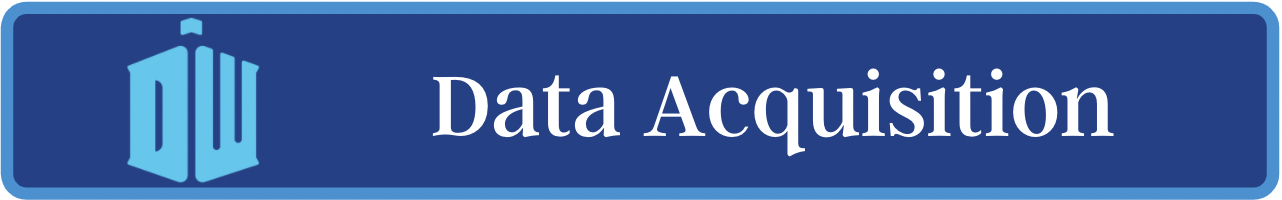

In [1]:
import acquire
import pandas as pd

## <span style='color:black'> <span style='background :deepskyblue' > To acquire this data: </span>
1. I went to https://github.com/ 
2. Typed "Doctor Who" into the search bar
3. I then created a function to scrape all the repos that came up with this search
4. These functions then went into webscraping functions to create a csv containing the repo file name, primary coding language used, and the contents of the README files.
- From this point I will be pulling my data frame from the csv created.

*To see all funcitons used in the data acquisition stage please see the acquire.py file in my github repository*

In [2]:
# Named the data fram dw to stand for Doctor Who
dw = pd.read_csv('dw.csv')
dw.sample(3)

,Unnamed: 0,repo,language,readme_contents
184,184,manza33/doctor_who,Java,NaN
46,46,Rahul-Lal/whoisthedoctor,JavaScript,# A starter webpack project for React\n\nThis ...
118,118,ANPez/WhoApi,Go,# WhoApi\nA Doctor Who's API for testing pourp...


## <span style='color:black'> <span style='background :deepskyblue' > This dataframe is in complete disarray! </span>
- My readme_contents column has astrics, capital letters, etc. Both my language and readme content contain null values!

<img src="https://github.com/CaitlynCarney/coding_language_prediction/blob/main/photos/for_final_notebook/tardis_distress.jpeg?raw=true" alt="image info" />

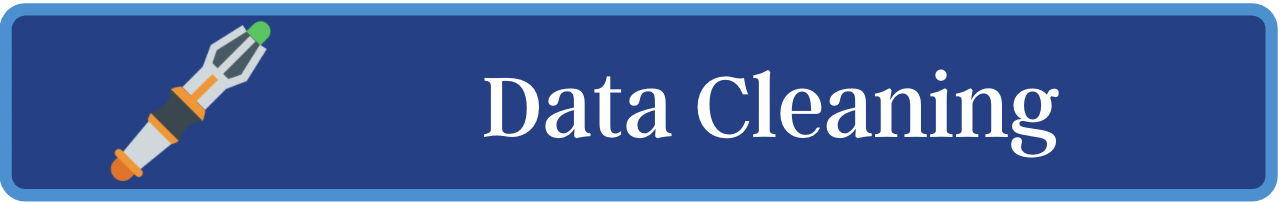

In [3]:
import prepare

## <span style='color:black'> <span style='background :deepskyblue' > To clean this data I needed to:
1. Drop all null values in language and readme_content
2. Make all characters in readme_content lowercase
3. Tokenize the strings in readme_content
4. Stem/Lemmatize the strings
5. Remove stopwords inludeing some new stopwords of my choosing.

- Please note that:
    - I chose to create a new column for each step of the cleaning process.
        - I did this because if I wanted to come back and add in repos later on, I may need to use stemming process instead of the lemmatizing process.
- From this point I will be pulling from the clean_dw csv I created.

*For functions used in the cleaning process please see my prepare.py in my github repository*

In [4]:
dw = pd.read_csv('clean_dw.csv')
dw.sample(3)

,Unnamed: 0,Unnamed: 0.1,repo,language,readme_contents,cleaned_content,tokenized_content,stemmed_content,lemma_content,no_stopwords_stem,no_stopwords_lemma,all_clean_stem,all_clean_lemma
7,8,8,WhoCraft/Regeneration,Java,[![](https://i.imgur.com/GcUuiUW.png#center)](...,httpsiimgurcomgcuuiuwpngcenterhttpswwwcursefor...,httpsiimgurcomgcuuiuwpngcenterhttpswwwcursefor...,httpsiimgurcomgcuuiuwpngcenterhttpswwwcursefor...,httpsiimgurcomgcuuiuwpngcenterhttpswwwcursefor...,httpsiimgurcomgcuuiuwpngcenterhttpswwwcursefor...,httpsiimgurcomgcuuiuwpngcenterhttpswwwcursefor...,httpsiimgurcomgcuuiuwpngcenterhttpswwwcursefor...,httpsiimgurcomgcuuiuwpngcenterhttpswwwcursefor...
82,191,191,efficacy/doctor-who-mf,JavaScript,# doctor-who-mf\n\n[![NPM](https://nodei.co/np...,doctorwhomf\n\nnpmhttpsnodeiconpmdoctorwhomfp...,doctorwhomf\n\nnpmhttpsnodeiconpmdoctorwhomfpn...,doctorwhomf npmhttpsnodeiconpmdoctorwhomfpngdo...,doctorwhomf npmhttpsnodeiconpmdoctorwhomfpngdo...,doctorwhomf npmhttpsnodeiconpmdoctorwhomfpngdo...,doctorwhomf npmhttpsnodeiconpmdoctorwhomfpngdo...,doctorwhomf npmhttpsnodeiconpmdoctorwhomfpngdo...,doctorwhomf npmhttpsnodeiconpmdoctorwhomfpngdo...
77,176,176,aharker619/Doctor-who,Jupyter Notebook,# Doctor-who\n## Project folder for CAPP30122 ...,doctorwho\n project folder for capp30122 cour...,doctorwho\n project folder for capp30122 cours...,doctorwho project folder for capp30122 cours f...,doctorwho project folder for capp30122 course ...,doctorwho project folder capp30122 course pred...,doctorwho project folder capp30122 course pred...,doctorwho project folder capp30122 course pred...,doctorwho project folder capp30122 course pred...


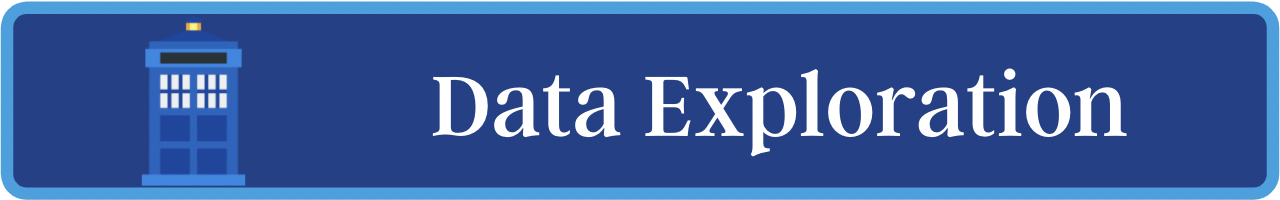

In [5]:
import explore

## <span style='color:black'> <span style='background :deepskyblue' > Let's look into the coding languages used!

In [6]:
languages = explore.show_counts_and_ratios(dw)
languages[:5]

,n,percent
JavaScript,34,0.295652
HTML,17,0.147826
Java,15,0.130435
Python,13,0.113043
C#,7,0.060870


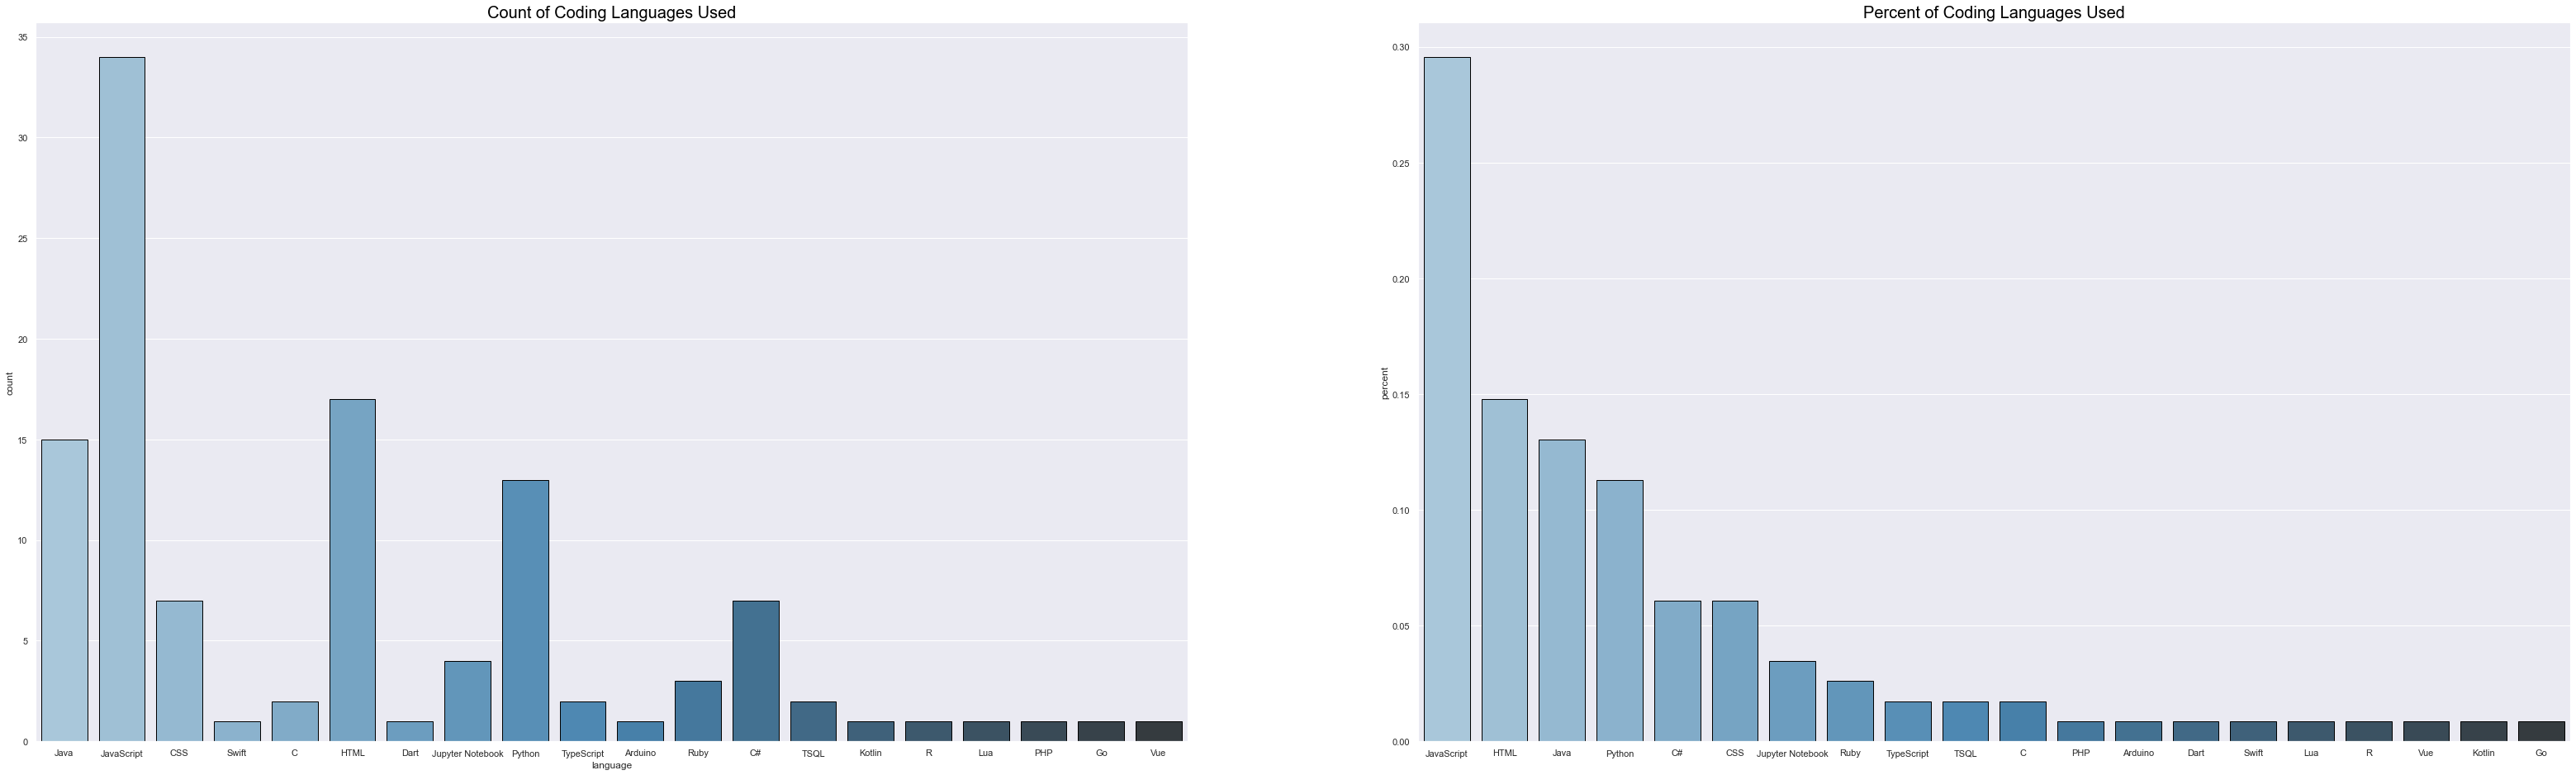

In [7]:
explore.plot_count_and_percent(dw, languages)

### <span style='color:black'> <span style='background :lightblue' > Takeaways:
- Top 5 languages: 
    - 29.56% of languages used are Java Script
        - This makes it the top language used by a significant margin
    - 14.78% of the languages used are HTML
    - 13.04% used Java
    - 6.09% use Python
    - 6.09% use C#

___

In [8]:
js_words, html_words, java_words, python_words, cpound_words, css_words = explore.seperate_top_six(dw)
all_words = explore.string_for_all(dw)
swift_words, c_words, dart_words, jupyter_words, script_words, arduino_words, ruby_words, tsql_words, kotlin_words, r_words, lua_words, php_words, go_words, vue_words = explore.seperate_leftovers(dw)
js_freq, html_freq, java_freq, python_freq, cpound_freq, css_freq = explore.top_six_freq(js_words, html_words, java_words, python_words, cpound_words, css_words)
all_freq = explore.all_freq(all_words)
swift_freq, c_freq, dart_freq, jupyter_freq, script_freq, arduino_freq, ruby_freq, tsql_freq, kotlin_freq, r_freq, lua_freq, php_freq, go_freq, vue_freq = explore.leftovers_freq(swift_words, c_words, dart_words, jupyter_words, script_words, arduino_words, ruby_words, tsql_words, kotlin_words, r_words, lua_words, php_words, go_words, vue_words)

## <span style='color:black'> <span style='background :deepskyblue' > Compare the top words for:
- Java Script
- HTML
- Java
- Python

### <span style='color:black'> <span style='background :lightblue' > Java Script top words

In [9]:
js_freq[:10]

build      262
npm        260
app        258
run        227
react      223
project    155
file       140
using      131
test       131
create     127
dtype: int64

### <span style='color:black'> <span style='background :lightblue' > HTML top words

In [10]:
html_freq[:10]

baker                40
tom                  34
jon                  19
pertwee              19
netflixamazonhulu    16
william              11
peter                11
davison              11
hartnell             11
sylvester            10
dtype: int64

### <span style='color:black'> <span style='background :lightblue' > Java top words

In [11]:
java_freq[:10]

spring                      25
data                        21
application                 19
curl                        15
links                       13
href                        13
rest                        13
httplocalhost8080people1    12
create                      12
person                      10
dtype: int64

### <span style='color:black'> <span style='background :lightblue' > Python top words

In [12]:
python_freq[:10]

10         17
pknk       11
p1n1       11
p2n2       11
pquote     10
episode    10
quote       9
data        9
11          9
said        9
dtype: int64

### <span style='color:black'> <span style='background :lightblue' > Takeaways:
- Each coding language has a difference set of top words
    - This is a good sign that I am moving in the right direction

___

## <span style='color:black'> <span style='background :deepskyblue' > Compare Single Word Wordclouds for Top 4 Languages

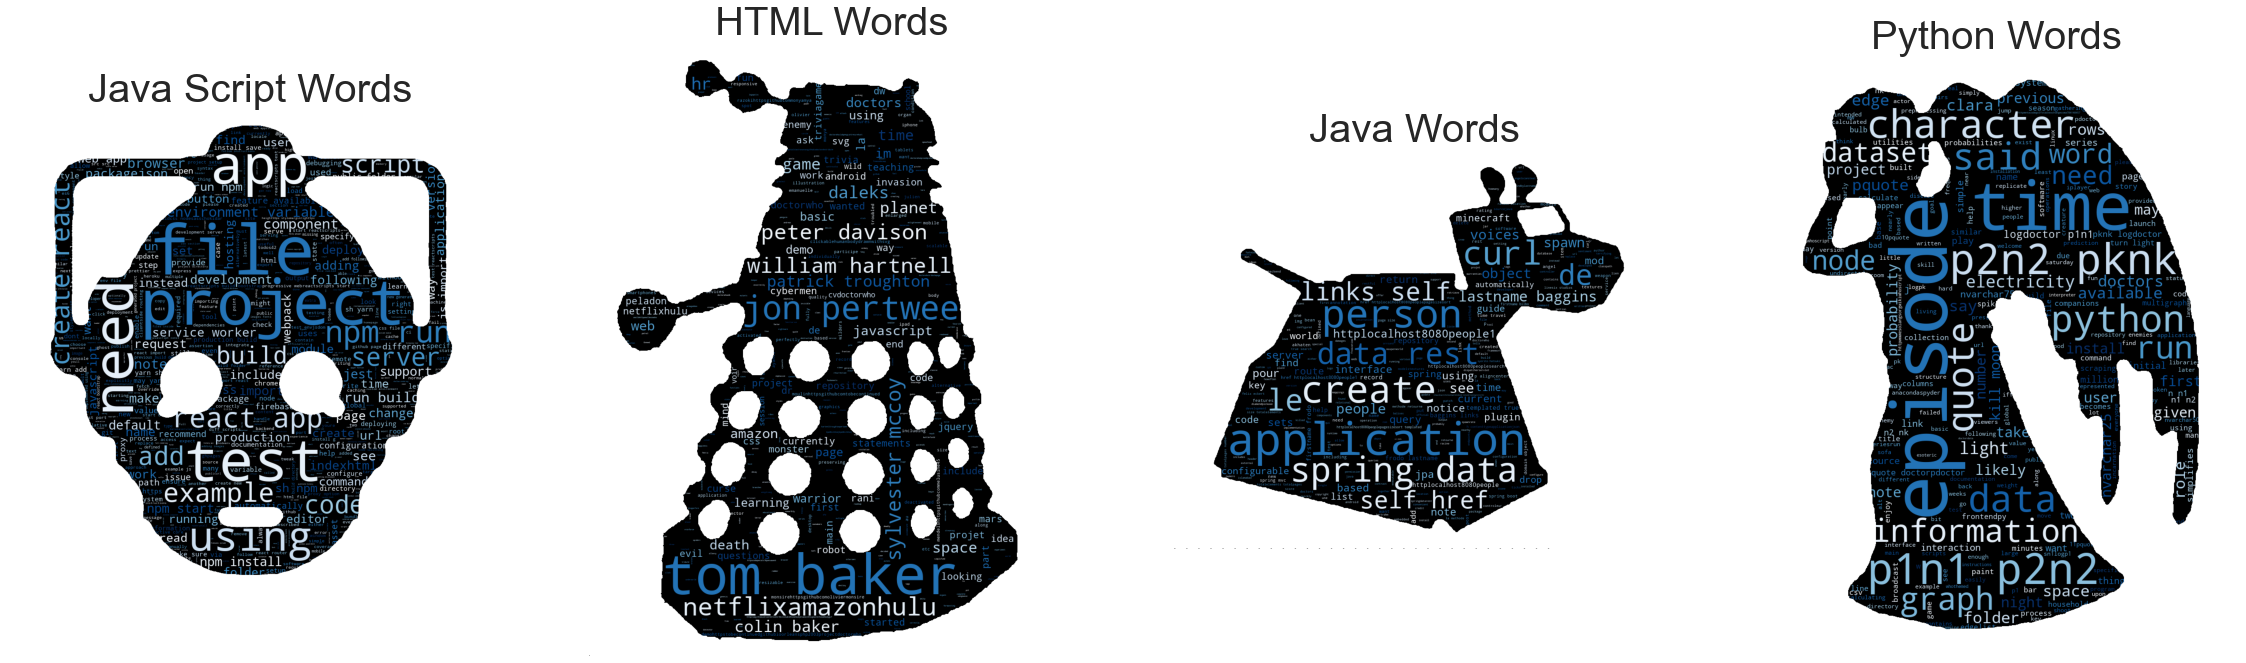

In [13]:
explore.compare_single_clouds(js_words, html_words, java_words, python_words)

### <span style='color:black'> <span style='background :lightblue' > Takeaways:

- This helped me visualize the different words and their frequencies.
- I can see that there is no real overlap of single words between the top 4 coding languages used.

___

## <span style='color:black'> <span style='background :deepskyblue' > Compare Bigrams Using a Bar Chart

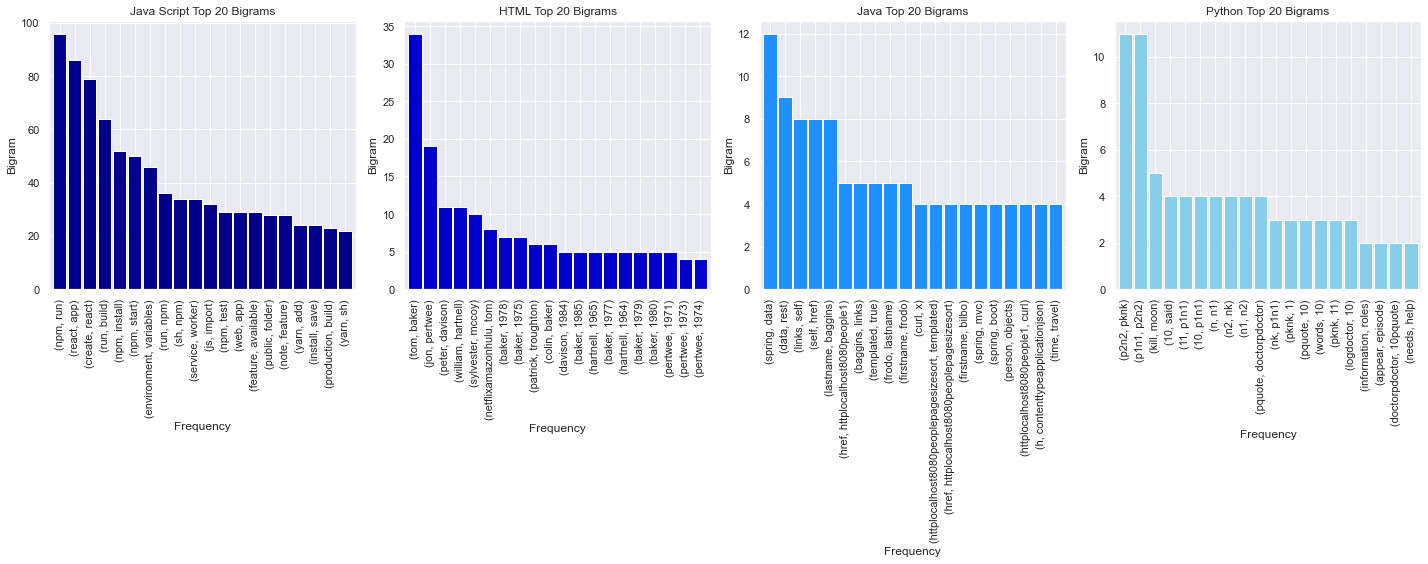

In [16]:
explore.compare_bigrams(js_words, html_words, java_words, python_words)

### <span style='color:black'> <span style='background :lightblue' > Takeaways:
- For Java Script there seems to be a decline in frequencies withoug having a major drop off
- HTML and Python have HUGE drop offs between their first, second, and third most frequently used terms.

___

## <span style='color:black'> <span style='background :deepskyblue' > Compare Bigrams Using a WordClouds

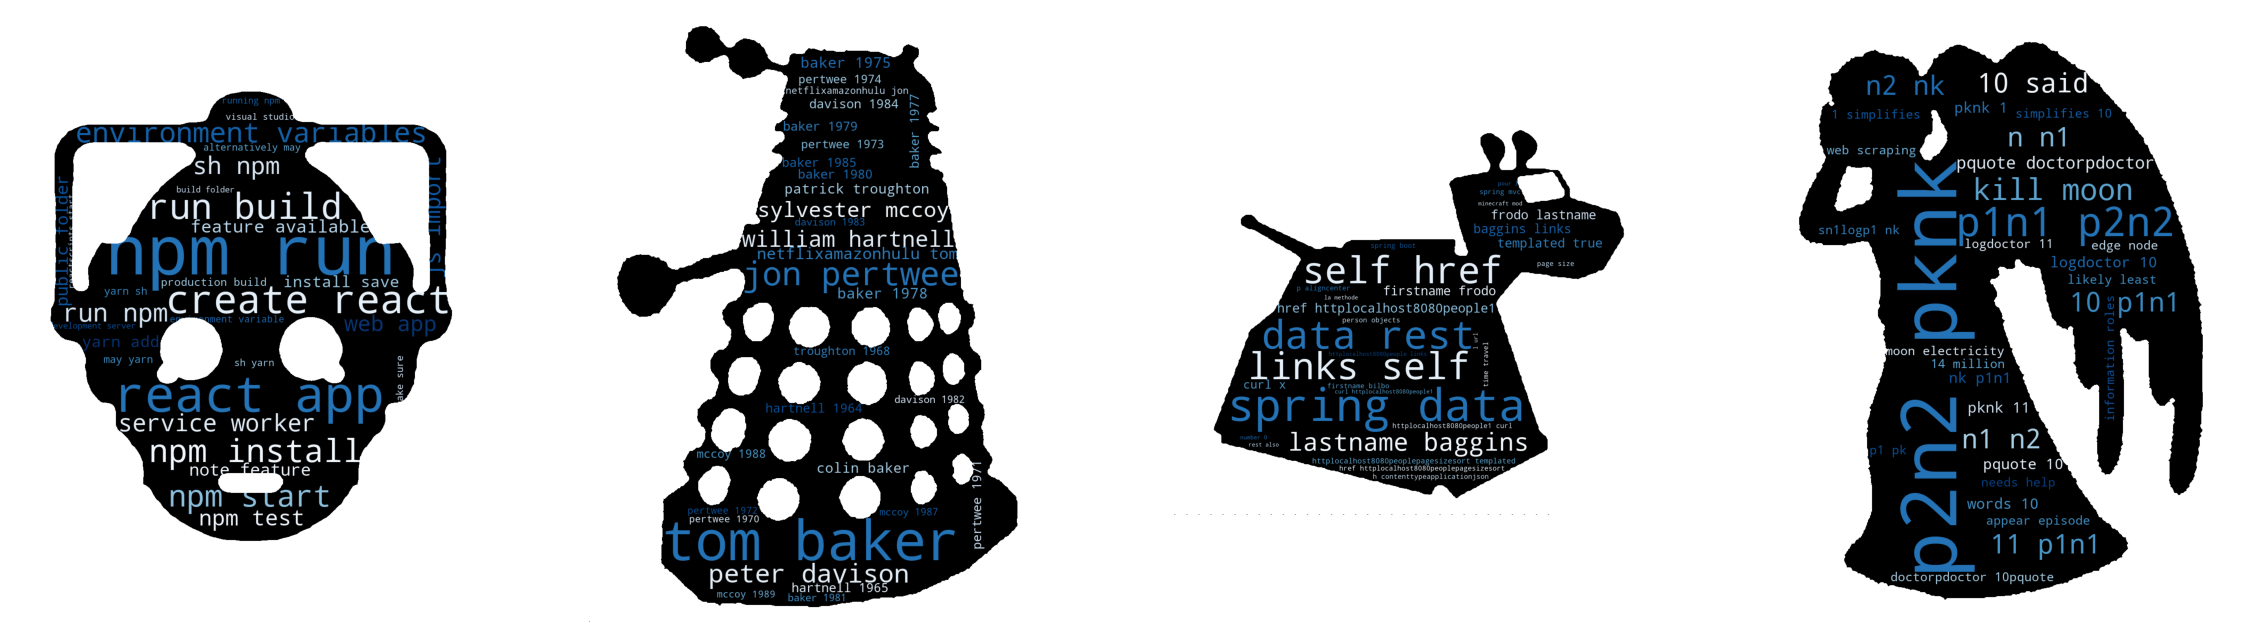

In [18]:
explore.compare_bigram_clouds(js_words, html_words, java_words, python_words)

### <span style='color:black'> <span style='background :lightblue' > Takeaways:
- There does not seem to be any over lap in word combos between the top 4 languages

___

## <span style='color:black'> <span style='background :deepskyblue' > Explore All Words Throughout All Languages

In [21]:
js_freq[:10]

build      262
npm        260
app        258
run        227
react      223
project    155
file       140
using      131
test       131
create     127
dtype: int64

In [20]:
all_freq[:10]

build      272
npm        265
app        263
run        249
react      224
project    187
file       160
using      153
create     147
test       138
dtype: int64

### <span style='color:black'> <span style='background :lightblue' > Takeaways:
- The top 10 words overall are the same top 10 words from Java Script

## <span style='color:black'> <span style='background :deepskyblue' > All Words Single Word Wordcloud

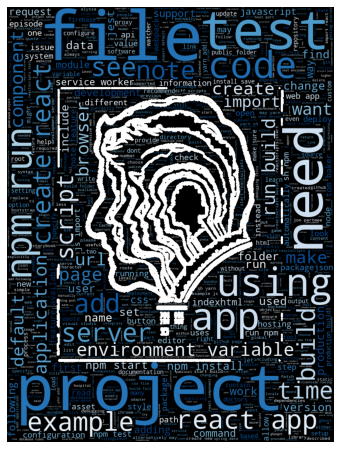

In [22]:
explore.all_words_cloud(all_words)

### <span style='color:black'> <span style='background :lightblue' > Takeaways:
- We can see the words that tend to be used more than other because of the sizing.
    - file
    - project
    - test
    - need
        - not on the top 10
    - using
    - ect. 
- this lines up with the top 10 words throughout all languages

## <span style='color:black'> <span style='background :deepskyblue' > All Words Bigram Bar Chart

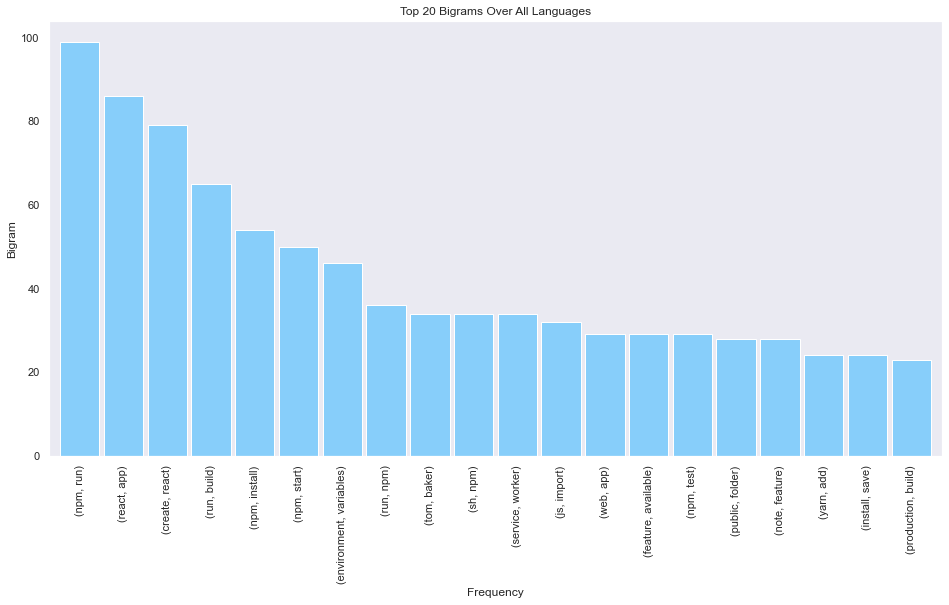

In [24]:
explore.all_bigrams_bar(all_words)

### <span style='color:black'> <span style='background :lightblue' > Takeaways:
- Steadly decreasing similar to Java Script's bigram bar graph.
    - This is probably because Java Acripts top 10 make up the overall top 10

## <span style='color:black'> <span style='background :deepskyblue' > All Words Bigram Word Cloud

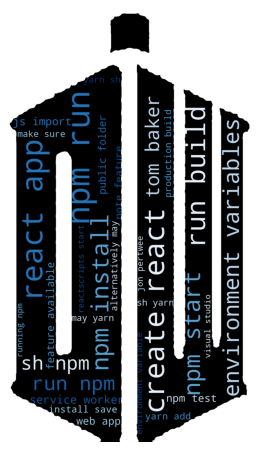

In [23]:
explore.all_bi_cloud(all_words)

### <span style='color:black'> <span style='background :lightblue' > Takeaways:
- We can see overlappping of this with all the other languages 
    - Minimal overlap with python
        - The overlap with python are scaled very small

*To see functions used in the exploration process pkease see explore.py in my github repository*

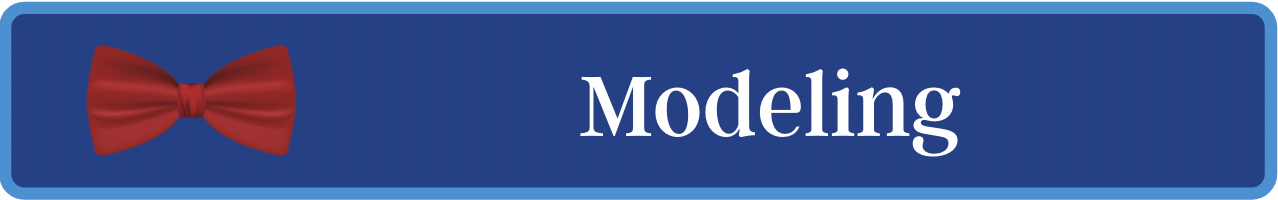

In [29]:
import model

## <span style='color:black'> <span style='background :deepskyblue' > Setting Baseline Accuracy

In [30]:
languages = explore.show_counts_and_ratios(dw)
languages[:4]

,n,percent
JavaScript,34,0.295652
HTML,17,0.147826
Java,15,0.130435
Python,13,0.113043


### <span style='color:black'> <span style='background :lightblue' > Takeaways:
- Baseline Accuracy is:
    - 29.5%

___ 

In [35]:
train, validate, test = model.split_top_4(dw)
X_train, X_validate, X_test, y_train, y_validate, y_test = model.split_into_x_y(train, validate, test)
X_train_vectorized, X_validate_vectorized, X_test_vectorized = model.vectorize_training(X_train, X_validate, X_test)

## <span style='color:black'> <span style='background :deepskyblue' > Getting All Model Accuracies

In [37]:
model.all_models(y_train, y_validate, y_test, X_train_vectorized, X_validate_vectorized, X_test_vectorized)

Logistic regression accuracy on the train data set is: 
 0.955
Logistic regression accuracy on the validate data set is: 
 0.421
________________________________________________________________
Balanced Logistic Regression accuracy on the train data set is: 
 0.977
Balanced Logistic Regression accuracy on the validate data set is: 
 0.526
________________________________________________________________
KNN accuracy on the train data set is: 
 0.614
KNN accuracy on the validate data set is: 
 0.579
________________________________________________________________
Decision Tree accuracy on the train data set is: 
 0.523
Decision Tree accuracy on the validate data set is: 
 0.368
________________________________________________________________
Random Forest accuracy on the train data set is: 
 0.432
Random Forest accuracy on the validate data set is: 
 0.421
________________________________________________________________
Ridge Classifier accuracy on the train data set is: 
 0.545
Ridge Cl

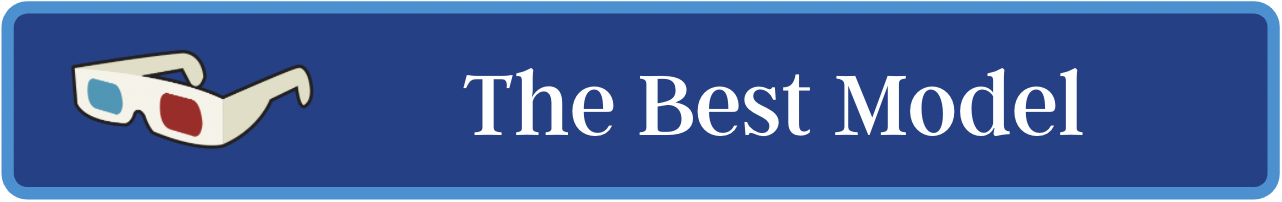

## The best model is:
- SDG Classifier model

In [38]:
model.sgd_best_model(y_train, y_validate, y_test, X_train_vectorized, X_validate_vectorized, X_test_vectorized)

Baseline Accuracy: 
 0.295
SGDClassifier Model Train: 
 0.977
SGDClassifier Model Validate: 
 0.579
SGDClassifier Model Test: 
 0.438


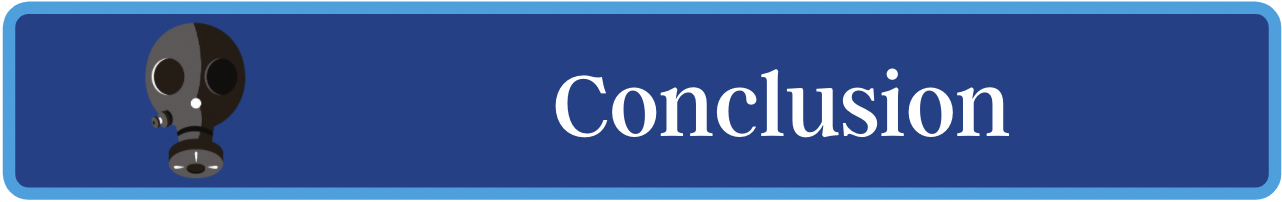

I found that there are no commonalities in frequent words or phrases between the top 4 coding languages. I also found the Java script is the most commonly used out of the languages and makes up for the most common top 10 most common words out af all of the langauges.
    
With more time I would love to gether more repos and see if I can improve the model by obtaining more observations.

I recommend using this model to predict the primary coding language used based on github readme files. 

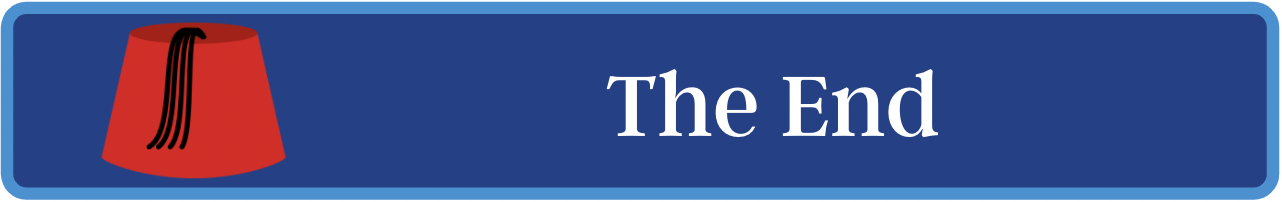

Much better!

<img src="https://github.com/CaitlynCarney/coding_language_prediction/blob/main/photos/for_final_notebook/tardis_stary.jpeg?raw=true" alt="image info" />